<a href="https://colab.research.google.com/github/Sarthakparmar-04/Fast_Food_detection/blob/main/Copy_of_Fast_Food_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
if data_path.is_dir():
  print(f"{data_path} directory exists......")


else:
  print(f"Did not find {data_path} directory,  creating one....")
  data_path.mkdir(parents=True,exist_ok=True)

data directory exists......


In [ ]:
import os
import requests
from bs4 import BeautifulSoup

# Second Section: Declare important variables
google_image = "https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&"

user_agent = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"
}

# Third Section: Build the main function
saved_folder ='French Fries'


def main():
    if not os.path.exists(saved_folder):
        os.mkdir(saved_folder)
    download_images()


# Fourth Section: Build the download function
def download_images():
    data = input('What are you looking for? ')
    n_images = int(input('How many images do you want? '))

    print('searching...')

    search_url = google_image + 'q=' + data

    response = requests.get(search_url, headers=user_agent)

    html = response.text

    soup = BeautifulSoup(html, 'html.parser')

    results = soup.findAll('img', {'class': 'rg_i Q4LuWd'})

    count = 1
    links = []
    for result in results:
        try:
            link = result['data-src']
            links.append(link)
            count += 1
            if(count > n_images):
                break

        except KeyError:
            continue

    print(f"Downloading {len(links)} images...")

    for i, link in enumerate(links):
        response = requests.get(link)

        image_name = saved_folder + '/' + data + str(i+1) + '.jpg'

        with open(image_name, 'wb') as fh:
            fh.write(response.content)


# Fifth Section: Run your code
if __name__ == "__main__":
    main()


import shutil
  
# Source path
source = saved_folder
  
# Destination path
destination = "/content/data"
  
# Move the content of
# source to destination
dest = shutil.move(source, destination)

KeyboardInterrupt: ignored

In [ ]:
import torch
from torch import nn
from torchvision import datasets


torch.__version__

'1.12.1+cu113'

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torchvision
weights=torchvision.models.ViT_B_16_Weights.DEFAULT
model_1=torchvision.models.vit_b_16(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

In [ ]:
change_transforms=weights.transforms()
change_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
data_transforms=transforms.Compose([
            transforms.Resize([256,256]),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])
data_transforms

Compose(
    Resize(size=[256, 256], interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
image_path_list=list(data_path.glob("*/*.jpg"))
total_count=len(image_path_list)
total_count

480

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets, models




model_dataset = datasets.ImageFolder("/content/data", transform=change_transforms) 
train_count = int(0.8 * total_count) 

test_count = total_count - train_count



train_dataset, test_dataset = torch.utils.data.random_split(
    model_dataset, (train_count, test_count)
)


In [ ]:
class_names=model_dataset.classes
class_names

['Burger', 'French Fries', 'Manchorian', 'Momos', 'Sandwich', 'pizza']

Random image Path:data/French Fries/French Fries76.jpg
Image class:French Fries
Image height:168
Image width:300


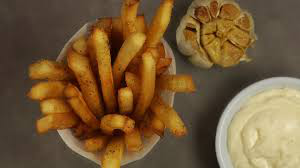

In [ ]:
import random
from PIL import Image

image_path_l1=list(data_path.glob("*/*.jpg"))
img_path=random.choice(image_path_l1)
image_class=img_path.parent.stem

img=Image.open(img_path)

print(f"Random image Path:{img_path}")
print(f"Image class:{image_class}")
print(f"Image height:{img.height}")
print(f"Image width:{img.width}")
img

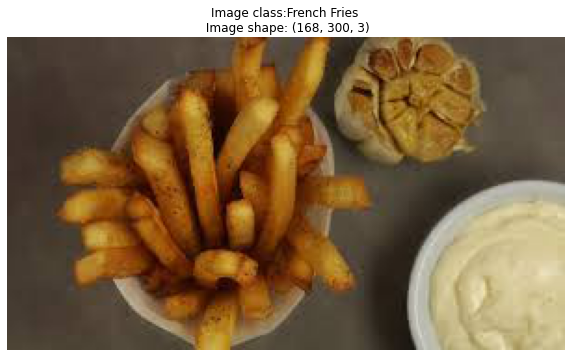

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.title(f"Image class:{image_class} \n Image shape: {img_array.shape}")
plt.imshow(img_array)
plt.axis(False);


In [ ]:
def plot_transformed_images(image_paths,transform,n=3):


  random_image_paths=random.sample(image_paths,k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
   
      fig,ax=plt.subplots(1,2);
      ax[0].imshow(f);
      ax[0].set_title(f"Original \n size: {f.size}");
      ax[0].axis("off");


      transformed_image=transform(f).permute(1,2,0);
      ax[1].imshow(transformed_image);
      ax[1].set_title(f"Transformed \n size: {transformed_image.shape}");
      ax[1].axis("off");

    

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16);

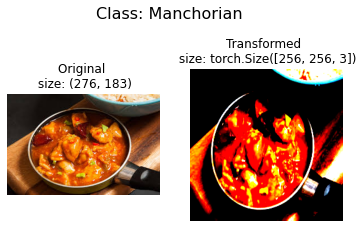

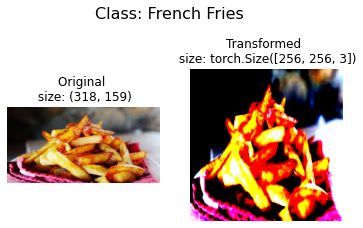

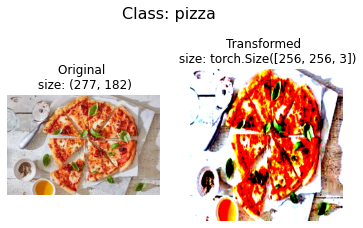

In [ ]:
plot_transformed_images(image_path_list,transform=data_transforms,n=3)

In [ ]:
img,label=train_dataset[0]

print(f"Image shape:{img.shape}")
print(f"Image type:{img.dtype}")
print(f"Label: {label}")
print(f"label type:{type(label)}")

Image shape:torch.Size([3, 224, 224])
Image type:torch.float32
Label: 2
label type:<class 'int'>


Original Shape: torch.Size([3, 224, 224])
Matplotlib Required shape: torch.Size([224, 224, 3])


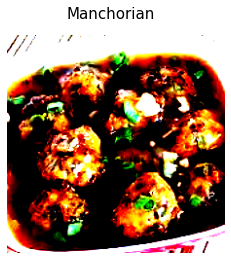

In [ ]:
image_permute=img.permute(1,2,0)
print(f"Original Shape: {img.shape}")
print(f"Matplotlib Required shape: {image_permute.shape}")

plt.imshow(image_permute)
plt.suptitle(class_names[label],fontsize=15)
plt.axis(False);


In [ ]:
import os
from torch.utils.data import DataLoader
Batch_size=32
num=os.cpu_count()




train_dataloader=DataLoader(train_dataset,Batch_size,shuffle=True,num_workers=num)
test_dataloader=DataLoader(test_dataset,Batch_size,shuffle=False,num_workers=num)

In [ ]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # requires torchvision >= 0.13, "DEFAULT" means best available

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)
pretrained_transform=pretrained_vit_weights.transforms()

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
    
# 4. Change the classifier head (set the seeds to ensure same initialization with linear head)

pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
# pretrained_vit # uncomment for model output 

In [ ]:
!pip install torchinfo
from torchinfo import summary

# # Print a summary of our custom ViT model using torchinfo (uncomment for actual output)


# # Print a summary of our custom ViT model using torchinfo (uncomment for actual output)
summary(model=pretrained_vit, 
       input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
       #col_names=["input_size"], # uncomment for smaller output
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"]
 ) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 6]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [ ]:
img_batch,label_batch=next(iter(train_dataloader))

img_test=img_batch[0].unsqueeze(dim=0)
label_test=label_batch[0]

print(f"Single image shape:{img_test.shape}")
print(f"Class label: {class_names[label_test]}")

pretrained_vit.eval()
with torch.inference_mode():
  pred=pretrained_vit(img_test.to(device))


print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
label=torch.argmax(torch.softmax(pred, dim=1), dim=1)
print(f"Output prediction label:\n{class_names[label]}\n")
print(f"Actual label:\n{class_names[label_test]}")

Single image shape:torch.Size([1, 3, 224, 224])
Class label: Momos
Output logits:
tensor([[ 0.4576,  0.1074, -0.3913, -0.5086, -0.6584, -0.0914]],
       device='cuda:0')

Output prediction probabilities:
tensor([[0.2926, 0.2061, 0.1252, 0.1113, 0.0958, 0.1690]], device='cuda:0')

Output prediction label:
Burger

Actual label:
Momos


In [ ]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
NUM_EPOCHS = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=pretrained_vit, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0523 | train_acc: 0.9948 | test_loss: 0.1215 | test_acc: 0.9479
Epoch: 2 | train_loss: 0.0372 | train_acc: 0.9948 | test_loss: 0.1050 | test_acc: 0.9896
Epoch: 3 | train_loss: 0.0267 | train_acc: 0.9948 | test_loss: 0.1208 | test_acc: 0.9583
Epoch: 4 | train_loss: 0.0220 | train_acc: 0.9974 | test_loss: 0.1180 | test_acc: 0.9583
Epoch: 5 | train_loss: 0.0162 | train_acc: 1.0000 | test_loss: 0.1048 | test_acc: 0.9583
Epoch: 6 | train_loss: 0.0148 | train_acc: 0.9948 | test_loss: 0.1050 | test_acc: 0.9688
Epoch: 7 | train_loss: 0.0123 | train_acc: 1.0000 | test_loss: 0.1084 | test_acc: 0.9688
Epoch: 8 | train_loss: 0.0107 | train_acc: 1.0000 | test_loss: 0.1086 | test_acc: 0.9688
Epoch: 9 | train_loss: 0.0102 | train_acc: 1.0000 | test_loss: 0.1042 | test_acc: 0.9688
Epoch: 10 | train_loss: 0.0088 | train_acc: 1.0000 | test_loss: 0.1085 | test_acc: 0.9688
Total training time: 72.803 seconds


In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

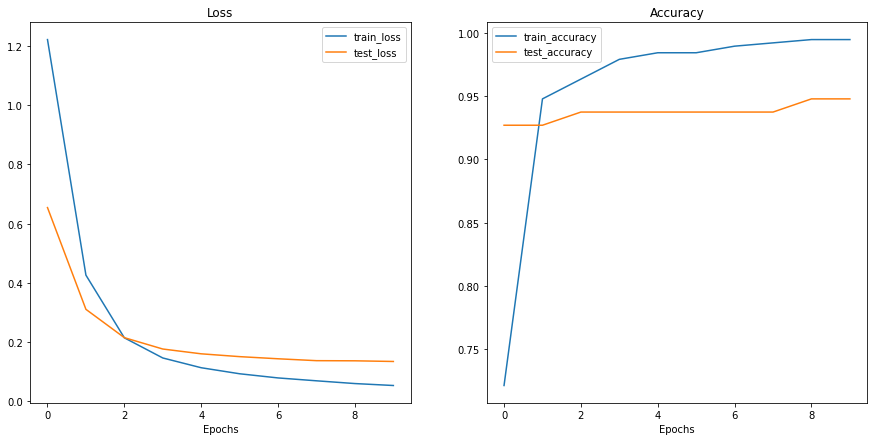

In [ ]:
plot_loss_curves(model_results)

In [ ]:
from pathlib import Path
from tqdm.auto import tqdm

test_data_paths=list(Path(data_path).glob("*/*.jpg"))
test_labels=[path.parent.stem for path in test_data_paths]

def pred_and_store(test_paths,model,transform,class_names,device):
  test_pred_list=[]
  for path in tqdm(test_paths):

   pred_dict={}

   pred_dict["image_path"]=path

   class_name=path.parent.stem

   pred_dict["class_name"]=class_name



   from PIL import Image


   img=Image.open(path)
   transformed_image=transform(img).unsqueeze(dim=0)


   model.eval

   with torch.inference_mode():
     pred_logit=model(transformed_image.to(device))
     pred_prob=torch.softmax(pred_logit,dim=1)
     pred_label=torch.argmax(pred_prob,dim=1)
     pred_class=class_names[pred_label.cpu()]



     pred_dict["pred_prob"]=pred_prob.unsqueeze(dim=0).max().cpu().item()

     pred_dict["pred_class"]=pred_class


     pred_dict["correct"]=class_name==pred_class


     test_pred_list.append(pred_dict)


  return test_pred_list

In [ ]:
test_pred_dicts = pred_and_store(test_paths=test_data_paths,
                                 model=pretrained_vit,
                                 transform=change_transforms,
                                 class_names=class_names,
                                 device=device)

test_pred_dicts[:10]

  0%|          | 0/480 [00:00<?, ?it/s]

[{'image_path': PosixPath('data/Sandwich/Sandwich30.jpg'),
  'class_name': 'Sandwich',
  'pred_prob': 0.9614742398262024,
  'pred_class': 'Sandwich',
  'correct': True},
 {'image_path': PosixPath('data/Sandwich/Sandwich29.jpg'),
  'class_name': 'Sandwich',
  'pred_prob': 0.9985333681106567,
  'pred_class': 'Sandwich',
  'correct': True},
 {'image_path': PosixPath('data/Sandwich/Sandwich34.jpg'),
  'class_name': 'Sandwich',
  'pred_prob': 0.988705575466156,
  'pred_class': 'Sandwich',
  'correct': True},
 {'image_path': PosixPath('data/Sandwich/Sandwich18.jpg'),
  'class_name': 'Sandwich',
  'pred_prob': 0.7547893524169922,
  'pred_class': 'Sandwich',
  'correct': True},
 {'image_path': PosixPath('data/Sandwich/Sandwich40.jpg'),
  'class_name': 'Sandwich',
  'pred_prob': 0.9927300810813904,
  'pred_class': 'Sandwich',
  'correct': True},
 {'image_path': PosixPath('data/Sandwich/Sandwich60.jpg'),
  'class_name': 'Sandwich',
  'pred_prob': 0.9766421318054199,
  'pred_class': 'Sandwich',
 

In [ ]:
import pandas as pd

test_pred_df=pd.DataFrame(test_pred_dicts)

top_5_most_wrong=test_pred_df.sort_values(by=["correct","pred_prob"],ascending=[True,False]).head()

In [ ]:
top_5_most_wrong

,image_path,class_name,pred_prob,pred_class,correct
257,data/pizza/pizza57.jpg,pizza,0.887454,Sandwich,False
368,data/Burger/Burger32.jpg,Burger,0.702546,Sandwich,False
436,data/French Fries/French Fries5.jpg,French Fries,0.530631,Sandwich,False
233,data/Manchorian/Manchorian36.jpg,Manchorian,0.999992,Manchorian,True
243,data/pizza/pizza79.jpg,pizza,0.999991,pizza,True


In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

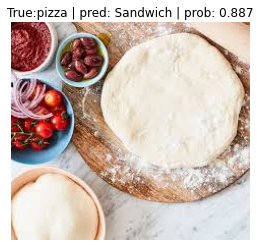

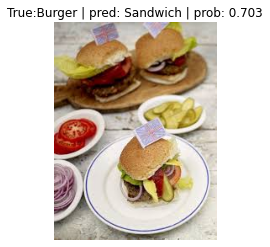

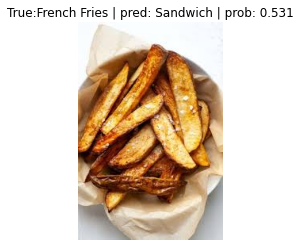

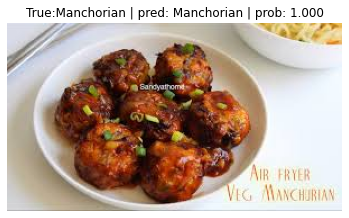

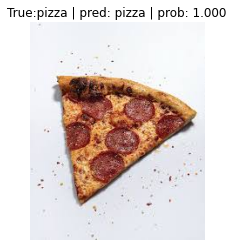

In [ ]:
import torchvision
import matplotlib.pyplot as plt

for row in top_5_most_wrong.iterrows():
  row=row[1]

  image_path=row[0]
  truth_label=row[1]
  pred_prob=row[2]
  pred_class=row[3]


  img=torchvision.io.read_image(str(image_path))
  plt.figure()
  plt.imshow(img.permute(1,2,0))
  plt.title(f"True:{truth_label} | pred: {pred_class} | prob: {pred_prob:.3f}")
  plt.axis(False)

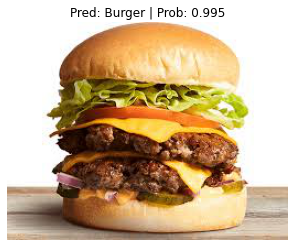

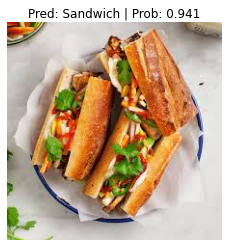

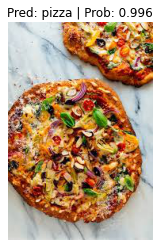

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(data_path).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=pretrained_vit, 
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        device=device)

In [ ]:
!wget https://images.unsplash.com/photo-1588315029754-2dd089d39a1a 
!cp photo-1588315029754-2dd089d39a1a pizza.jpg


--2022-10-07 08:52:07--  https://images.unsplash.com/photo-1588315029754-2dd089d39a1a
Resolving images.unsplash.com (images.unsplash.com)... 199.232.46.208, 2a04:4e42:48::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.46.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343742 (4.1M) [image/jpeg]
Saving to: ‘photo-1588315029754-2dd089d39a1a’

photo-1588315029754 100%[===================>]   4.14M  --.-KB/s    in 0.01s   

2022-10-07 08:52:07 (351 MB/s) - ‘photo-1588315029754-2dd089d39a1a’ saved [4343742/4343742]



In [ ]:
!wget https://images.unsplash.com/photo-1571091655789-405eb7a3a3a8
!cp photo-1571091655789-405eb7a3a3a8 "Burger.jpg"

--2022-10-07 08:58:06--  https://images.unsplash.com/photo-1571091655789-405eb7a3a3a8
Resolving images.unsplash.com (images.unsplash.com)... 199.232.46.208, 2a04:4e42:48::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.46.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7309808 (7.0M) [image/jpeg]
Saving to: ‘photo-1571091655789-405eb7a3a3a8’

photo-1571091655789 100%[===================>]   6.97M  --.-KB/s    in 0.02s   

2022-10-07 08:58:07 (282 MB/s) - ‘photo-1571091655789-405eb7a3a3a8’ saved [7309808/7309808]



In [ ]:
!wget https://images.unsplash.com/photo-1598679253544-2c97992403ea
!cp photo-1598679253544-2c97992403ea "French_Fries.jpg"

--2022-10-07 09:10:27--  https://images.unsplash.com/photo-1598679253544-2c97992403ea
Resolving images.unsplash.com (images.unsplash.com)... 199.232.46.208, 2a04:4e42:48::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.46.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2924019 (2.8M) [image/jpeg]
Saving to: ‘photo-1598679253544-2c97992403ea.1’

photo-1598679253544 100%[===================>]   2.79M  --.-KB/s    in 0.02s   

2022-10-07 09:10:27 (164 MB/s) - ‘photo-1598679253544-2c97992403ea.1’ saved [2924019/2924019]



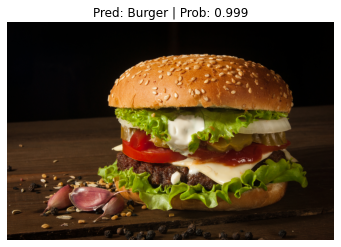

In [ ]:
pred_and_plot_image(model=pretrained_vit, 
                        image_path="Burger.jpg",
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        device=device)

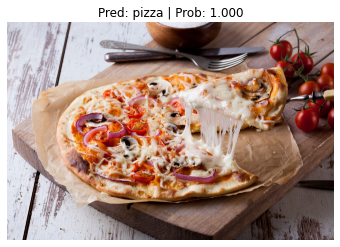

In [ ]:
pred_and_plot_image(model=pretrained_vit, 
                        image_path="pizza.jpg",
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        device=device)

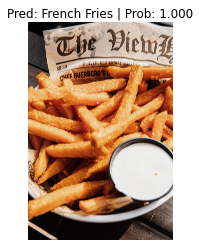

In [ ]:

pred_and_plot_image(model=pretrained_vit, 
                        image_path="French Fries.jpg",
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        device=device)